# MOwNiT 
## Laboratorium
## Wybrane zagadnienia algebry liniowej, faktoryzacja
### Algebra liniowa w Julii
https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/


In [1]:
using(LinearAlgebra)

In [2]:
methods(factorize)

# 10 methods for generic function "factorize" from LinearAlgebra:
  [1] factorize(S::SymTridiagonal)
     @ ~/.julia/juliaup/julia-1.11.3+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/ldlt.jl:172
  [2] factorize(A::Adjoint)
     @ ~/.julia/juliaup/julia-1.11.3+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/dense.jl:1493
  [3] factorize(A::Tridiagonal)
     @ ~/.julia/juliaup/julia-1.11.3+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/lu.jl:656
  [4] factorize(A::Transpose)
     @ ~/.julia/juliaup/julia-1.11.3+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/dense.jl:1494
  [5] factorize(a::Number)
     @ ~/.julia/juliaup/julia-1.11.3+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/dense.jl:1495
  [6] factorize(A::Bidiagonal)
     @ ~/.julia/juliaup/julia-1.11.3+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/bidiag.jl:992
  [7] factorize(D::Diagonal)
     @ ~/.julia/juliaup/julia-1.11.3+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/diagonal.jl:215
  [8] factorize(A::LinearAlgebra.AbstractTriangular)
     @ ~/.julia/juliaup/julia-1.11.3+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/triangular.jl:2750
  [9] factorize(A::Union{Hermitian{T, S}, Symmetric{T, S}} where {T, S})
     @ ~/.julia/juliaup/julia-1.11.3+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/symmetric.jl:585
 [10] factorize(A::AbstractMatrix{T}) where T
     @ ~/.julia/juliaup/julia-1.11.3+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/dense.jl:1419

In [3]:
#wiersze vs kolumny
x1=[1 2 2]

1×3 Matrix{Int64}:
 1  2  2

In [4]:
y1=[1 ;2 ;3]

3-element Vector{Int64}:
 1
 2
 3

In [5]:
transpose(x1)

3×1 transpose(::Matrix{Int64}) with eltype Int64:
 1
 2
 2

In [6]:
#iloczyn skalarny
dot(x1,y1)

11

 Długość wektora liczymy jako pierwiastek z jego iloczynu skalarnego 
$$ \lVert\mathbf{v}\rVert = \sqrt{\mathbf{v}\cdot \mathbf{v}}=\sqrt{\sum_{i=1}^nv_i^2}$$



#### Przykładowe dane

In [7]:
#losujemy macierz 3x3
A=rand(3,3)

3×3 Matrix{Float64}:
 0.629639  0.262486  0.401343
 0.286876  0.773718  0.33635
 0.492822  0.624824  0.368053

In [8]:
#losujemy wektor x
x=rand(3)

3-element Vector{Float64}:
 0.803106966329308
 0.31173793882932344
 0.8333003190498188

In [9]:
# wyliczamy b
b=A*x

3-element Vector{Float64}:
 0.9219331505083669
 0.7518693716491217
 0.8972682346262919

### Sposoby rozwiązania Ax=b

In [10]:
#mozemy policzyc odwrotność macierzy i wymnożyć
# uwaga: nieefektywne!
inv(A) * b

3-element Vector{Float64}:
 0.803106966329306
 0.3117379388293224
 0.833300319049819

In [11]:
#najlepiej używać zoptymalizowanego operatora "\""
x=A\b

3-element Vector{Float64}:
 0.8031069663293066
 0.31173793882932294
 0.8333003190498214

 operator "\\" wybiera odpowiednią faktoryzację:
- https://docs.julialang.org/en/v1.8/stdlib/LinearAlgebra/#LinearAlgebra.factorize
- https://docs.julialang.org/en/v1.8/stdlib/LinearAlgebra/#man-linalg-factorizations-1
 


### Faktoryzacja LU

In [12]:
# W przypadku ogólnej macierzy kwadratowej jest to faktoryzacja LU z pivotem
Af=factorize(A)

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
 1.0       0.0       0.0
 0.455619  1.0       0.0
 0.782706  0.641123  1.0
U factor:
3×3 Matrix{Float64}:
 0.629639  0.262486   0.401343
 0.0       0.654124   0.15349
 0.0       0.0       -0.0444865

In [ ]:
# A*x = b <==> L * (U * x) = b -> to samo, gdzie U i L to macierze trojkatne
# dzieki temu rozwiazujemy 2 rowniania, ale mamy macierze trojkatne U i L, którymi latwiej sie rozwiazuje rownianie

# L - macierz trojkatana dolna
Af.L

3×3 Matrix{Float64}:
 1.0       0.0       0.0
 0.455619  1.0       0.0
 0.782706  0.641123  1.0

In [ ]:
#Macierz U

# U - macierz trojkatana gorna
Af.U

3×3 Matrix{Float64}:
 0.629639  0.262486   0.401343
 0.0       0.654124   0.15349
 0.0       0.0       -0.0444865

In [17]:
# wektor permulatacji wierszy 
Af.p

3-element Vector{Int64}:
 1
 2
 3

In [16]:
# mozemy zamienic macierz A na postać zfaktoryzowaną
A=factorize(A)

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
 1.0       0.0        0.0
 0.685251  1.0        0.0
 0.884912  0.0874448  1.0
U factor:
3×3 Matrix{Float64}:
 0.678729  0.0467853   0.890448
 0.0       0.840794    0.18634
 0.0       0.0        -0.713349

In [17]:
# i działać na niej operatorem \
# operator ten będzie wykorzytywał raz utworzony wynik faktoryzacji
A\b

3-element Vector{Float64}:
 0.9242941433374685
 0.7693797037954715
 0.38289928484966174

In [18]:
# dla różnych prawych stron równania z tą samą macierzą
c=rand(3);
A\c

3-element Vector{Float64}:
  0.6330551030548651
 -0.3540509617398862
  0.20812358461148753

### Faktoryzacja QR


In [19]:
B=rand(10,5)

10×5 Matrix{Float64}:
 0.746808   0.313534    0.0430173  0.275334    0.816386
 0.858701   0.0632319   0.170214   0.385384    0.758841
 0.933492   0.547123    0.738172   0.115346    0.360514
 0.645987   0.134709    0.714415   0.00646594  0.301245
 0.550227   0.735544    0.470995   0.449242    0.646497
 0.78214    0.639756    0.526352   0.66396     0.595244
 0.0534965  0.743798    0.191474   0.864911    0.314373
 0.418481   0.00038528  0.158739   0.682263    0.82492
 0.264744   0.585749    0.491305   0.698283    0.147575
 0.329406   0.0904659   0.613165   0.67183     0.235585

In [20]:
# W przypadku ogólnej macierzy prostokątnej wybierana jest faktoryzacja QR z pivotem
factorize(B)

QRPivoted{Float64, Matrix{Float64}, Vector{Float64}, Vector{Int64}}
Q factor: 10×10 LinearAlgebra.QRPackedQ{Float64, Matrix{Float64}, Vector{Float64}}
R factor:
5×5 Matrix{Float64}:
 -1.96338  -1.0965   -1.02686   -1.22667   -1.57505
  0.0       1.35297   0.677995   0.304625   0.454853
  0.0       0.0      -0.872069  -0.260426   0.212979
  0.0       0.0       0.0       -0.773863   0.44406
  0.0       0.0       0.0        0.0       -0.402118
permutation:
5-element Vector{Int64}:
 1
 4
 2
 3
 5

- $Q$ to macierz  ortogonalna mxm, co oznacza, że  $Q^T*Q=Q*Q^T=I$ czyli $Q^{-1}=Q^T$ (odwracanie takich macierzy jest szybkie i nie generuje dodatkowych błędów !)
- $R$ to macierz postaci $\begin{pmatrix} Rfactor \\ 0 \end{pmatrix} $ , gdzie $Rfactor$ jest macierzą trójkątną górną, a 0 to macierz zer o wymierze nx(m-n)

### Zastosowanie faktoryzacji do metody najmniejszych kwadratów

Jednym z zastosowań faktoryzacji QR jest użycie jej do metody najmniejszych kwadratów.

Przykład:

Obliczmy dopasowanie wielomianu $$f(x)=wsp_2*x^2+wsp_1*x+wsp_0$$ do punktów (1,1) (2,2) (3,4) (4, 4) (5,3) (6,0)

- Budujemy układ równań wg wzoru $$wsp_2x_i^2+wsp_1x_i+wsp_0=y_i$$:
$$wsp_2*1^2+wsp_1*1+wsp_0=1$$
$$wsp_2*2^2+wsp_1*2+wsp_0=2$$
$$wsp_2*3^2+wsp_1*3+wsp_0=4$$
$$wsp_2*4^2+wsp_1*4+wsp_0=4$$
$$wsp_2*5^2+wsp_1*5+wsp_0=3$$
$$wsp_2*6^2+wsp_1*6+wsp_0=0$$

- Układ ten  nie ma dokładnego rozwiązania. Możemy jednak znaleźć najlepsze przybliżenie, czyli takie $wsp_i$, które minimalizują odległość:

$$\sqrt{\sum_{i=1}^{6}{(y_i-f(x_i))^2}}=\lVert y-A*wsp\rVert$$





Jak użyć do tej mimalizacji faktoryzacji QR:

#### 1. Tworzymy macierz A na postawie $(x_i,y_i)$

In [19]:
A=zeros(6,3) 

6×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

 punkty $(x_i,y_i)$


In [20]:
x=[1; 2 ;3 ;4 ;5 ;6]
y=[1; 2; 4; 4; 3; 0]

6-element Vector{Int64}:
 1
 2
 4
 4
 3
 0

In [21]:
A[:,1]=x.^2

6-element Vector{Int64}:
  1
  4
  9
 16
 25
 36

In [22]:
A[:,2]=x

6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6

In [23]:
A[:,3]=ones(6)

6-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [24]:
A

6×3 Matrix{Float64}:
  1.0  1.0  1.0
  4.0  2.0  1.0
  9.0  3.0  1.0
 16.0  4.0  1.0
 25.0  5.0  1.0
 36.0  6.0  1.0

#### 2. Dokonujemy faktoryzacji QR macierzy A 

In [25]:
 AF=factorize(A)

QRPivoted{Float64, Matrix{Float64}, Vector{Float64}, Vector{Int64}}
Q factor: 6×6 LinearAlgebra.QRPackedQ{Float64, Matrix{Float64}, Vector{Float64}}
R factor:
3×3 Matrix{Float64}:
 -47.697  -9.24587  -1.90788
   0.0    -2.34816  -1.43091
   0.0     0.0       0.559017
permutation:
3-element Vector{Int64}:
 1
 2
 3

In [26]:
Q=Matrix(AF.Q)

6×3 Matrix{Float64}:
 -0.0209657  -0.343313    0.838525
 -0.0838628  -0.521522    0.167705
 -0.188691   -0.534625   -0.223607
 -0.335451   -0.382624   -0.33541
 -0.524142   -0.0655178  -0.167705
 -0.754765    0.416693    0.279508

In [27]:
# można przetestować ortogonalność:
Transpose(Q)*Q

3×3 Matrix{Float64}:
  1.0          9.19262e-17  -1.28002e-16
  9.19262e-17  1.0           3.12591e-17
 -1.28002e-16  3.12591e-17   1.0

Mamy równanie:
$$A*wsp=y$$
Dla $A=QR$:
$$QR*wsp =y$$
Możemy obydwie strony wymnożyć z lewej przez $Q^T$:
$$R*wsp =Q^T y$$
$$\begin{pmatrix} Rfactor \\ 0 \end{pmatrix} wsp= Q^T y$$

Poszukiwanym rozwiązaniem jest rozwiązanie równania będącego górną niezerową częścią:
$$Rfactor * wsp= Q^T y[1:n]$$
$$wsp=Rfactor \setminus Q^T y[1:n]$$

In [28]:
# implementacja powyższego (uwaga: w tym przykladzie nie jest potrzebna permutacja,
# bo wektor permutacji wynosi[1 2 3])
AF.R\((Transpose(Q)*y)[1:3])

3-element Vector{Float64}:
 -0.5714285714285727
  3.9428571428571524
 -2.8000000000000194

Więcej informacji:
- http://www.math.uconn.edu/~leykekhman/courses/MATH3795/Lectures/Lecture_8_Linear_least_squares_orthogonal_matrices.pdf
- http://www.seas.ucla.edu/~vandenbe/133A/lectures/qr.pdf

W praktyce używamy tego algorytmu poprzez operator "\\", za którym jest on "schowany".

In [29]:
A \ y

3-element Vector{Float64}:
 -0.5714285714285726
  3.9428571428571515
 -2.8000000000000176

In [30]:
#sprawdzamy czy dostaliśmy dobre wspólczynniki
using Polynomials
fit(x,y, 2)

Polynomial(-2.8000000000000176 + 3.9428571428571515*x - 0.5714285714285726*x^2)

In [31]:
@which fit

Polynomials

### Zadania

#### Zadanie 1 (1pkt)
Ustal losowe (referencyjne) x rozmiaru 1000 oraz losowe A rozmiaru 1000x1000, policz b=A*x.
Nastepnie rozwiąż równanie Ax=b trzema metodami:
- inv()
- \
- factorize()

Porównaj jakość wyniku (zmierzoną jako długość różnicy wektorów wyniku oraz referencyjnego x) oraz czas wykonania (@time). UWAGA: pierwsze wykonanie funkcji w Julii zawiera czas kompilacji tej funkcji, dlatego czas mierzymy  od drugiego wywołania !

#### Zadanie 2 (1pkt)
Policz współczynniki wielomianu aproksymującego dowolne dane z poprzednich laboratoriów tworząc wprost układ równań i rozwiązujac go (metoda z użyciem faktoryzacji QR zaprezentowana na tym laboratorium).
Porównaj wyniki z tymi otrzymanymi poprzednio.

#### Zadanie 3 (2 pkt)

Znajdź i zaprezentuj działanie innego zastosowania wybranej faktoryzacji. Przykładowe (ale nie jedyne!) tematy:

-    tworzenie pseudoinversji macierzy (http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-macausland-pseudo-inverse-present.pdf).

-   uzycie faktoryzacji QR do znajdowania wartości własnych (https://en.wikipedia.org/wiki/QR_algorithm)

-  zastosowanie faktoryzacji SVD - np. zastosowania w uczeniu maszynowym 



In [43]:
using Polynomials, LinearAlgebra, Plots,DataFrames,CSV

### Zadanie 1

In [44]:
x = rand(1000)
A = rand(1000,1000)
b = A*x
df = DataFrame(Method=String[],Difference=Float64[],Time=Float64[])

invMethod = x - inv(A)*b
res1 = norm(invMethod)
# @elapsed nie wlicza czasu kompilacji przy pierwszym wywolaniu funkcji
time1 = @elapsed inv(A)*b
push!(df,("inv()",res1,time1))

normMethod = x - A\b
res2 = norm(normMethod)
time2 = @elapsed A\b
push!(df,("/",res2,time2))

Af = factorize(A)
factMethod = x - Af\b
res3 = norm(factMethod)
time3 = @elapsed factorize(A)\b
push!(df,("factorize()",res3,time3))

df

# Analiza wykresu:
# Czasu jest duo większy dla uzycia inv() co udowadnia zalozienie, ktore wystepuje w opisie laboratorium
# / i factorize() daja identyczny wynik w postaci roznicy wyniku, przy lekko roznym czasie, jest to spowodane srodowiskiem testowym
# jakim jest komputer z procesami dzialajacymi w tle. Przez to ze / wybiera algorytm LU ktory jest wykorzystany w factorize()

Row,Method,Difference,Time
,String,Float64,Float64
1,inv(),5.6703e-11,0.0154065
2,/,2.86616e-11,0.130433
3,factorize(),2.86616e-11,0.00608367


### Zadanie 2

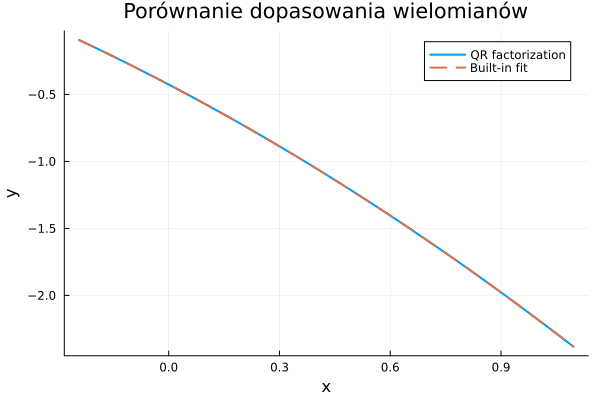

In [ ]:
using CSV, DataFrames, LinearAlgebra, Polynomials, Plots
# Stosuje wzor QR podany w konspekcie laboratorium

# Wczytanie danych z pliku
data = CSV.read("ecg_data.csv", DataFrame)
x = data.signalN         # zmienna niezależna
y = data.signalV         # zmienna zależna

# Zbudowanie macierzy projektującej dla wielomianu stopnia 2: [x^2 x 1]
design_matrix = zeros(length(x), 3)
design_matrix[:, 1] = x .^ 2
design_matrix[:, 2] = x
design_matrix[:, 3] .= 1.0

# Rozkład QR i rozwiązanie układu równań metodą najmniejszych kwadratów
qr_fact = factorize(design_matrix)
QTy = qr_fact.Q' * y
coefficients = qr_fact.R \ QTy[1:3]

# Utworzenie wielomianu z obliczonymi współczynnikami
qr_poly = Polynomial(coefficients)

# Dopasowanie wielomianu przy użyciu funkcji pakietowej (do porównania)
builtin_poly = fit(x, y, 2)

# Wizualizacja wyników
plot_range = extrema(x)
plot(qr_poly, plot_range..., label="QR factorization", lw=2)
plot!(builtin_poly, plot_range..., label="Built-in fit", lw=2, linestyle=:dash)
xlabel!("x")
ylabel!("y")
title!("Porównanie dopasowania wielomianów")

### Zadanie 3

### Zastosowanie faktoryzacji SVD do aproksymacji obrazu

W tym zadaniu pokazuję, jak można wykorzystać faktoryzację SVD (Singular Value Decomposition) do uproszczenia obrazu przy zachowaniu jego najważniejszych cech.

SVD rozkłada macierz `A` na trzy składniki:  
`A = U * Σ * Vᵗ`

- `U` i `V` to macierze ortogonalne (czyli "rotacje" przestrzeni),
- `Σ` to macierz diagonalna zawierająca tzw. wartości osobliwe (singular values), posortowane od największej.

Te wartości osobliwe mówią, które części danych są najważniejsze. Największe z nich odpowiadają głównym cechom obrazu, najmniejsze — szumowi lub detalom.

Zamiast używać wszystkich wartości, możemy wziąć tylko `k` największych i odtworzyć przybliżoną wersję obrazu:
`A_k ≈ U_k * Σ_k * V_kᵗ`

Im większe `k`, tym lepsze przybliżenie. Na wygenerowanym wykresie pokazuję obraz po odtworzeniu z `k = 100`. Choć używamy tylko części informacji, obraz wciąż wygląda dobrze.

To pokazuje, że wiele informacji da się uprościć bez dużej straty jakości. Takie podejście jest wykorzystywane m.in. w kompresji obrazów, redukcji szumu i w uczeniu maszynowym (np. PCA).

Podsumowując: faktoryzacja SVD pozwala zredukować ilość danych i nadal zachować ich sensowną reprezentację.

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


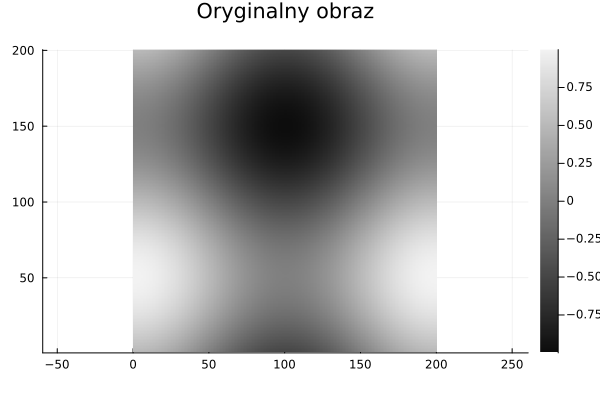

In [10]:
using Pkg
Pkg.add("ColorTypes")
using LinearAlgebra, Plots, ColorTypes

# Tworzymy syntetyczny obraz (gradient + wzór)
function generate_image(n)
    x = LinRange(0, 2π, n)
    y = LinRange(0, 2π, n)
    [0.5 * sin(xi) + 0.5 * cos(yj) for xi in x, yj in y]
end

# Faktoryzacja SVD i kompresja do k składowych
function compress_image_svd(A, k)
    U, S, V = svd(A)
    U[:, 1:k] * Diagonal(S[1:k]) * V[:, 1:k]'
end

# Generowanie obrazu
A = generate_image(200)

# Wyświetlenie oryginalnego obrazu oddzielnie
heatmap(A, color=:grays, title="Oryginalny obraz", aspect_ratio=1)

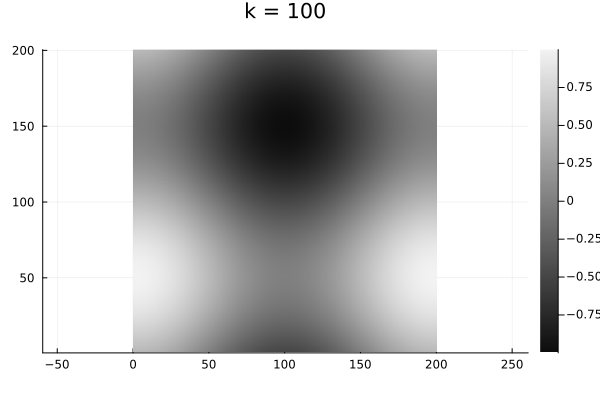

In [18]:


# Rysujemy oryginał i kompresje dla różnych k
plot(layout=(2, 3), size=(1000, 600))
k = 100

Ak = compress_image_svd(A, k)
plot!(heatmap(Ak, color=:grays, title="k = $k", aspect_ratio=1))


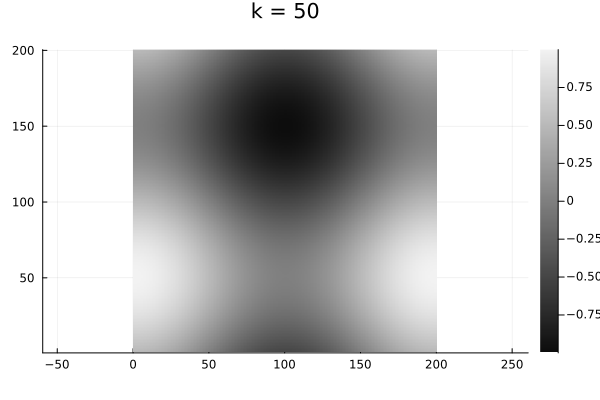

In [14]:
plot(layout=(2, 3), size=(1000, 600))
k = 50

Ak = compress_image_svd(A, k)
plot!(heatmap(Ak, color=:grays, title="k = $k", aspect_ratio=1))

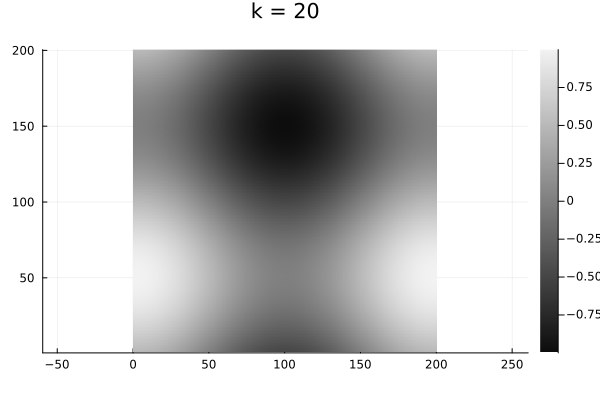

In [15]:
plot(layout=(2, 3), size=(1000, 600))
k = 20

Ak = compress_image_svd(A, k)
plot!(heatmap(Ak, color=:grays, title="k = $k", aspect_ratio=1))

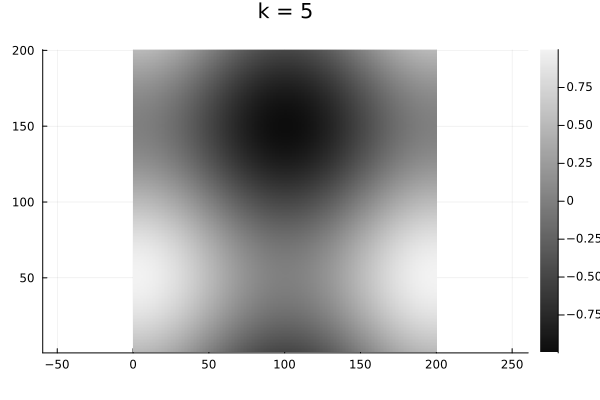

In [20]:
plot(layout=(2, 3), size=(1000, 600))
k = 5

Ak = compress_image_svd(A, k)
plot!(heatmap(Ak, color=:grays, title="k = $k", aspect_ratio=1))

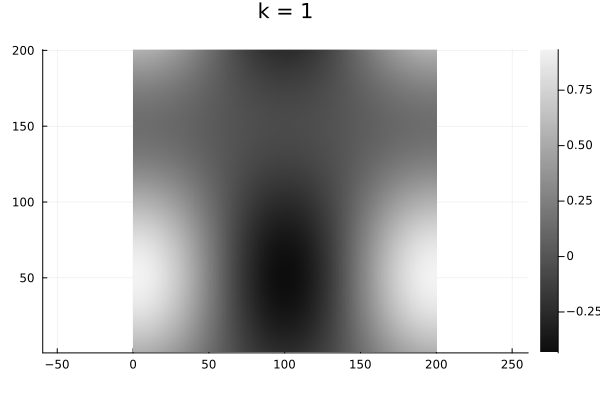

In [23]:
plot(layout=(2, 3), size=(1000, 600))
k = 1

Ak = compress_image_svd(A, k)
plot!(heatmap(Ak, color=:grays, title="k = $k", aspect_ratio=1))